 # Importing libraries, APIS & Tensorflow

In [1]:
# import future

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

# import tensorflow & tensorflow modules

import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

# import libraries for data processing

import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# import keras libraries that will be used for the transfer learning

from keras.applications import xception
from keras import models
from keras import layers

# import libraries for diagrams and plots

import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

# import image related libraries

import PIL
from PIL import Image
from contextlib import redirect_stdout
import sys

# import glob for directories

import glob

Using TensorFlow backend.


In [2]:
# print file name

file_name =  os.path.basename(sys.argv[0])
file_name = str(file_name)

# Trim the ".py" extensiojn from the file 

file_name = file_name[:-3]

print("Name of the File:", file_name)

Name of the File: ipykernel_launcher


In [3]:
# set another (very high) limit for image processing as some pictures may create bottleneck

PIL.Image.MAX_IMAGE_PIXELS = 9933120000

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

 # Setting up the directories of dataset and folders needed

In [4]:
# setting the paths, pathfiles

parent_dir = glob.glob(r'C:\**\SeAC Dataset/', recursive=True)
parent_dir = str(parent_dir[0])

# as the glob library provides the path in "\\" format we need to change it to "/"

parent_dir = parent_dir.replace('\\', '/')

path_train_images = parent_dir

saved_model_path = glob.glob(r'C:\**\Saved_Models/', recursive=True)
saved_model_path = str(saved_model_path[0])
saved_model_path = saved_model_path.replace('\\', '/')

path_scripts = glob.glob(r'C:\**\Scripts/', recursive=True)
path_scripts = str(path_scripts[0])
path_scripts = path_scripts.replace('\\', '/')

In [5]:
### Setting up all the parameters for the training, processing of data and produced files management ###

# import the labels of the dataset

train_labels_path = parent_dir + "Labels/" + "Classification_labels.xlsx"

data = pd.read_excel(train_labels_path, engine="openpyxl")

# check the 3 first lines of the dataframe to get  an idea of it

print(data.head(3))

           Artist_Name                      Painting_Name    Art_Genre  \
0  Wilhelm Kotarbinski  wilhelm-kotarbinski_roman-holiday  Art Nouveau   
1  Wilhelm Kotarbinski         wilhelm-kotarbinski_sappho  Art Nouveau   
2  Wilhelm Kotarbinski       wilhelm-kotarbinski_seraphim  Art Nouveau   

   Art Nouveau  Baroque  Impressionism  Italian Renaissance  \
0            1        0              0                    0   
1            1        0              0                    0   
2            1        0              0                    0   

   Post-Impressionism  Realism  Rococo  Romanticism  Street Art  Surrealism  
0                   0        0       0            0           0           0  
1                   0        0       0            0           0           0  
2                   0        0       0            0           0           0  


In [6]:
# check the number of rows and columns of the dataframe

print(data.shape)

(42964, 13)


In [14]:
### setting parameters for the training and also store them in a spreadsheet afterwards ###

# set batch size

num_batch = 5

# adjusting the size of images into the same dimensions

img_width = 250
img_height = 250

# adjsusting training parameters

lrn_rate = 0.0001  # learning rate
num_epochs = 10  # number of training epochs
act_func = "sigmoid"  # activation fuction

num_neurons_1st_dense = 100 # number of neurons in first dense layer
drop_perc_1st_dense = 0 # percentage of dropout rate in first dense layer

num_neurons_2nd_dense = 50 # number of neurons in second dense layer
drop_perc_2nd_dense = 0 # percentage of dropout rate in second dense layer

num_neurons_3d_dense = 25 # number of neurons in third dense layer
drop_perc_3d_dense = 0 # percentage of dropout rate in third dense layer

In [8]:
# create an empty list to take in the images

X = []

# attach the images with the labels, in order to have supervised learning and convert them to have values between 0 - 1 by multiplying with 255 (RGB values: 0 - 255)

for i in tqdm(range(data.shape[0])):
    path = (
        path_train_images
        + data["Art_Genre"][i]
        + "/"
        + data["Artist_Name"][i]
        + "/"
        + data["Painting_Name"][i]
        + ".jpg"
    )
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img / 255.0
    X.append(img)

# convert images into np array

X = np.array(X)

100%|██████████| 42964/42964 [14:41<00:00, 48.73it/s] 


In [9]:
# get the size of dataframe X

print("The shape of X dataframe is: ", X.shape)

The shape of X dataframe is:  (42964, 250, 250, 3)


In [10]:
# removing "unnecessary" columns, in order to have only the one-hot encoded columns for the training

y = data.drop(["Artist_Name", "Painting_Name", "Art_Genre"], axis=1)
y = np.array(y)

# inspect the size of new labels dataframe and make sure that columns match the number of classes

print("The shape of y list is: ", y.shape)

The shape of y list is:  (42964, 10)


In [11]:
# set that the evaluation to 10% of the total dataset
# the testing dataset will be 20% of the total dataset
# the final percentage of training set will be 70% of the total dataset

# create the train/test sets, set the size of test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create the test/validation sets, set the size of validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

# get the shapes of train, test and validation splits

print("The shape of X_train is: ", X_train.shape)
print("The shape of y_train is: ", y_train.shape)

print("The shape of X_test is: ", X_test.shape)
print("The shape of y_test is: ", y_test.shape)

print("The shape of X_val is: ", X_val.shape)
print("The shape of y_val is: ", y_val.shape)

The shape of X_train is:  (30075, 250, 250, 3)
The shape of y_train is:  (30075, 10)
The shape of X_test is:  (8593, 250, 250, 3)
The shape of y_test is:  (8593, 10)
The shape of X_val is:  (4296, 250, 250, 3)
The shape of y_val is:  (4296, 10)


In [12]:
# create the convolutional network

# imply dropout if needed in order to avoid overfitting
 
# Load the Xception model

xception_conv = xception.Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# we choose which training blocks we will freeze in order to adopt the train weights and unfreeze the rest:

"""" As this is a database of a fair size, we are choosing to unfreeze all the layers, to get the optimal result.

     In databases of smaller size, it will may be needed to freeze more layers, if not all""""

### Xception model has a total of 132 layers ###

for layer in xception_conv.layers[:]:
   layer.trainable = False
   
for layer in xception_conv.layers[:]:
   layer.trainable = True
    
# Check the trainable status of the individual layers

for layer in xception_conv.layers:
    print(layer.name, layer.trainable)
    
### Create the model ###

# Set the model as sequential

model = models.Sequential()

# Add the Xception convolutional base model

model.add(xception_conv)

# flatten all layers

model.add(layers.Flatten())

# Add new layers

# Add first additional dense layer

model.add(layers.Dense(num_neurons_1st_dense, activation='relu'))
#model.add(layers.Dropout(drop_perc_1st_dense))

# Add second additional dense layer

model.add(layers.Dense(num_neurons_2nd_dense, activation='relu'))
#model.add(layers.Dropout(drop_perc_2nd_dense))

# Add third additional dense layer (if needed)

model.add(layers.Dense(num_neurons_3d_dense, activation='relu'))
#model.add(layers.Dropout(drop_perc_3d_dense))

model.add(layers.Dense(10, activation= act_func))

# Show a summary of the model. Check the number of trainable parameters

model.summary()    

input_1 True
block1_conv1 True
block1_conv1_bn True
block1_conv1_act True
block1_conv2 True
block1_conv2_bn True
block1_conv2_act True
block2_sepconv1 True
block2_sepconv1_bn True
block2_sepconv2_act True
block2_sepconv2 True
block2_sepconv2_bn True
conv2d_1 True
block2_pool True
batch_normalization_1 True
add_1 True
block3_sepconv1_act True
block3_sepconv1 True
block3_sepconv1_bn True
block3_sepconv2_act True
block3_sepconv2 True
block3_sepconv2_bn True
conv2d_2 True
block3_pool True
batch_normalization_2 True
add_2 True
block4_sepconv1_act True
block4_sepconv1 True
block4_sepconv1_bn True
block4_sepconv2_act True
block4_sepconv2 True
block4_sepconv2_bn True
conv2d_3 True
block4_pool True
batch_normalization_3 True
add_3 True
block5_sepconv1_act True
block5_sepconv1 True
block5_sepconv1_bn True
block5_sepconv2_act True
block5_sepconv2 True
block5_sepconv2_bn True
block5_sepconv3_act True
block5_sepconv3 True
block5_sepconv3_bn True
add_4 True
block6_sepconv1_act True
block6_sepconv1 T

In [15]:
# Compile the model

model.compile(optimizer = RMSprop(lr=lrn_rate),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# train the model

history = model.fit(X_train, y_train,
              batch_size=num_batch,
              epochs=num_epochs,
              validation_data=(X_test, y_test))

Train on 30075 samples, validate on 8593 samples
Epoch 1/10
30075/30075 [==============================] - 631s 21ms/step - loss: 0.2085 - acc: 0.5722 - val_loss: 0.2085 - val_acc: 0.7282
Epoch 2/10
30075/30075 [==============================] - 571s 19ms/step - loss: 0.097 - acc: 0.816 - val_loss: 0.1411 - val_acc: 0.7582
Epoch 3/10
30075/30075 [==============================] - 571s 19ms/step - loss: 0.0522 - acc: 0.906 - val_loss: 0.1414 - val_acc: 0.7614
Epoch 4/10
30075/30075 [==============================] - 571s 19ms/step - loss: 0.0348 - acc: 0.9418 - val_loss: 0.1836 - val_acc: 0.7749
Epoch 5/10
30075/30075 [==============================] - 571s 19ms/step - loss: 0.0254 - acc: 0.9602 - val_loss: 0.2378 - val_acc: 0.7676
Epoch 6/10
30075/30075 [==============================] - 571s 19ms/step - loss: 0.0221 - acc: 0.9668 - val_loss: 0.2446 - val_acc: 0.7759
Epoch 7/10
30075/30075 [==============================] - 571s 19ms/step - loss: 0.021 - acc: 0.969 - val_loss: 0.2813 -

In [16]:
# print history keys

print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [17]:
# Create lists with accuracy and loss metrics that will be stored later in a .txt file for possible future use

epoch_list = []

acc_list = history.history["acc"]
print('accuracy list:', acc_list)

val_acc_list = history.history["val_acc"]
print('validation accuracy list:', val_acc_list)

loss_list = history.history["loss"]
print('loss list:', loss_list)

val_loss_list = history.history["val_loss"]
print('validation loss list:', val_loss_list)

accuracy list: [0.5722218751907349, 0.815987229347229, 0.9060317873954773, 0.9418101906776428, 0.9602646827697754, 0.966815173625946, 0.9689100384712219, 0.9720356464385986, 0.9734654426574707, 0.9757265448570251]
validation accuracy list: [0.7281508445739746, 0.7585243582725525, 0.7614337205886841, 0.7749330997467041, 0.7676015496253967, 0.7758640646934509, 0.7588735222816467, 0.7742348313331604, 0.7792389392852783, 0.7870359420776367]
loss list: [0.2085450142621994, 0.09693707525730133, 0.05225669965147972, 0.03479008749127388, 0.025454683229327202, 0.022056281566619873, 0.020992420613765717, 0.01953478343784809, 0.01902446337044239, 0.01785910688340664]
validation loss list: [0.13794472813606262, 0.14114618301391602, 0.1835508495569229, 0.23780864477157593, 0.2446373701095581, 0.28134021162986755, 0.34960150718688965, 0.2572411894798279, 0.3094271421432495, 0.4058603346347809]


In [18]:
# Create smoother lines in the graphs
# If this step is not taken, the same diagrams will be plotted, but with "sharper" edges

epoch_lim = num_epochs + 1

for i in range(1, epoch_lim):
    epoch_list.append(i)
    
x_plot = np.array(epoch_list)

y_plot_acc = np.array(history.history["acc"])
y_plot_val_acc = np.array(history.history["val_acc"])

X_Y_Spline_acc = make_interp_spline(x_plot, y_plot_acc)
X_Y_Spline_val_acc = make_interp_spline(x_plot, y_plot_val_acc)

# Returns evenly spaced numbers
# over a specified interval.

X_plot = np.linspace(x_plot.min(), x_plot.max())
y_plot_acc = X_Y_Spline_acc(X_plot)
y_plot_val_acc = X_Y_Spline_val_acc(X_plot)

In [ ]:
# plot the accuracy for train/test sets to check for overfitting or underfitting (less possible)
# Plotting the Graph

plt.plot(X_plot, y_plot_acc)
plt.plot(X_plot, y_plot_val_acc)
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="lower right")
plt.savefig(
    saved_model_path
    + file_name + "_model_accuracy.png"
)

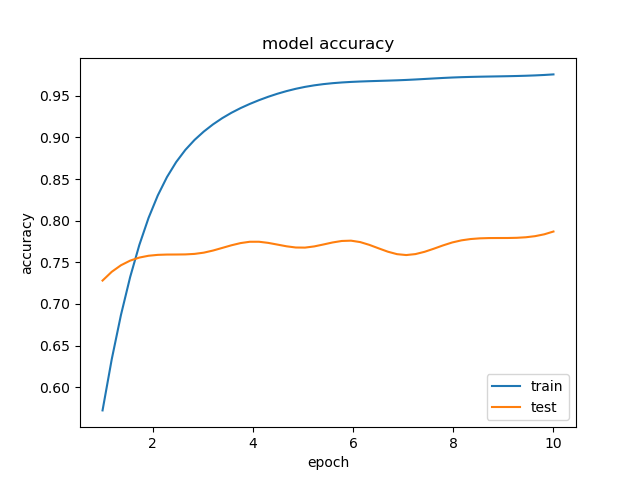

In [ ]:
# clear the plot area

plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

In [ ]:
# plot the loss for train/test sets to check again for overfitting or underfitting

# create "smoother" lines

y_plot_loss = np.array(history.history["loss"])
y_plot_val_loss = np.array(history.history["val_loss"])

X_Y_Spline_loss = make_interp_spline(x_plot, y_plot_loss)
X_Y_Spline_val_loss = make_interp_spline(x_plot, y_plot_val_loss)

# Returns evenly spaced numbers
# over a specified interval.

y_plot_loss = X_Y_Spline_loss(X_plot)
y_plot_val_loss = X_Y_Spline_val_loss(X_plot)

# Plotting the Graph

plt.plot(X_plot, y_plot_loss)
plt.plot(X_plot, y_plot_val_loss)
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.savefig(
    saved_model_path
    + file_name + "_model_loss.png"
)

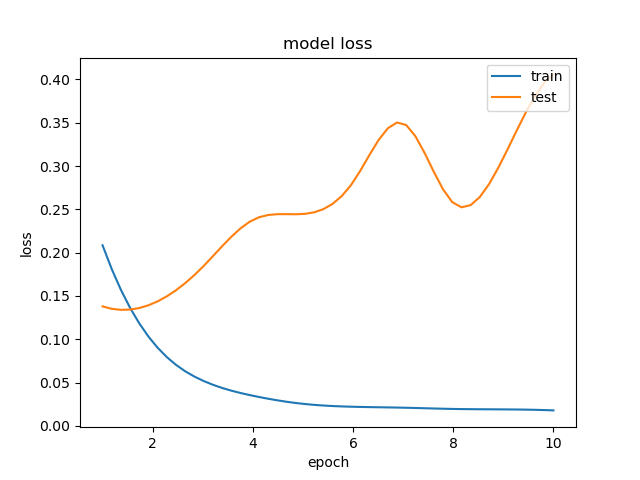

In [ ]:
# make predictions

predictions = model.predict(X_val)

# get the max values of the predictions and true values to get the metric values

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_val, axis=1)

accuracy_rate = accuracy_score(y_val, predictions)

accuracy_rate = Accuracy_rate * 100
accuracy_rate = round(Accuracy_rate, 2)

In [21]:
print("Success rate: {} %".format(accuracy_rate))

Success rate: 78.47 %


In [ ]:
# create a txt file to save the training parameters of the created model

with open(
    (
        saved_model_path
        + file_name + "_configuration.txt"
    ),
    "w",
) as f:
    f.write(
        "Successful identification rate: {} % \nNumber of epochs: {} \nLearning rate: {} \nImage height and width: {} \nActivation function: {} \naccuracy list: {} \nvalidation accuracy list: {} \nloss list: {} \nvalidation loss list: {} \n\n\n\n\n\n\n\n{}".format(
            accuracy_rate,
            num_epochs,
            lrn_rate,
            img_width,
            act_func,
            acc_list,
            val_acc_list,
            loss_list,
            val_loss_list,
            model.summary(),
        )
    )
    
# add the model summary to the created txt file

with open(
    (
        saved_model_path
        + file_name + "_configuration.txt"
    ),
    "a",
) as f:
    with redirect_stdout(f):
        model.summary()

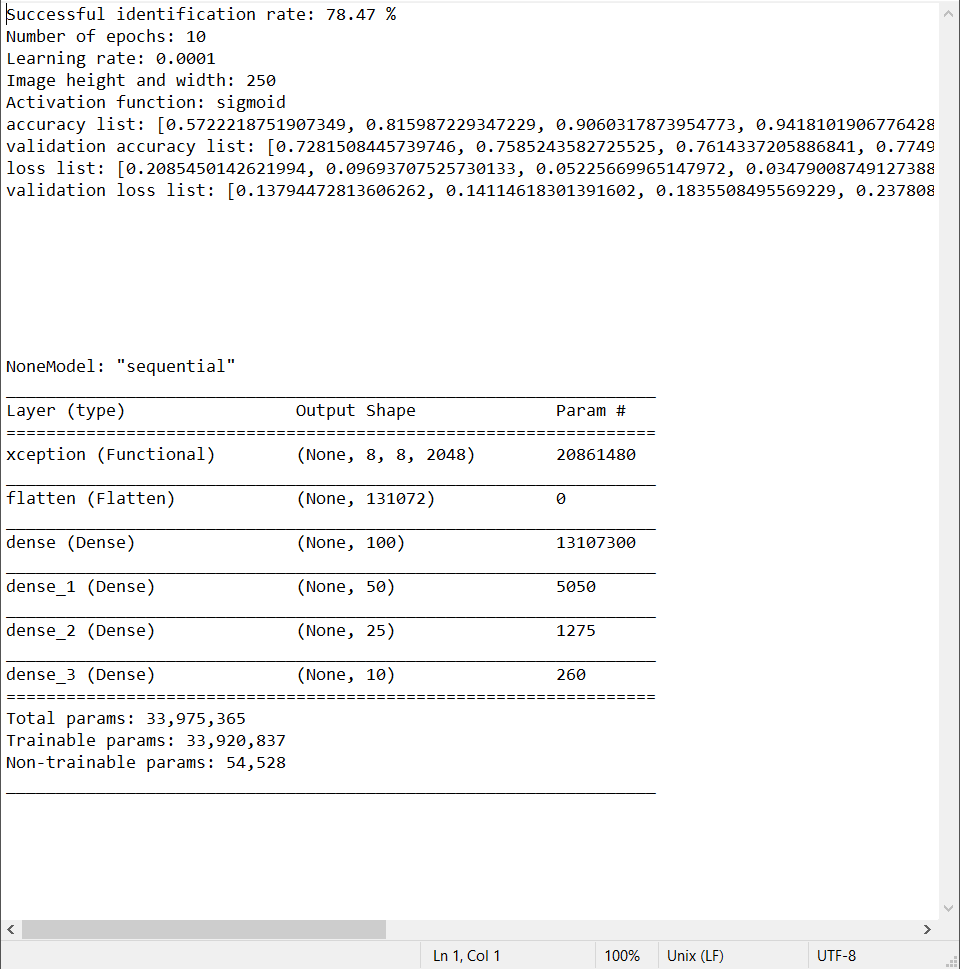

In [ ]:
# construct a confussion matrix to examine in which style the code performed better

conf_mat = confusion_matrix(y_val, predictions)

# get the names of the classes that correspond to the binary data-predictions/true values

cols_list = data['Art_Genre'].unique()
class_names = cols_list

# make a dataframe of the confusion matrix

conf_mat_dataframe = pd.DataFrame(
    conf_mat, index=[i for i in class_names], columns=[i for i in class_names]
)

# plot and save the confusion matrix
# format the confusion matrix in order to have a "nicer" output

plt.figure(figsize=(20, 16))
plt.rcParams.update({"font.size": 18})
plt.rcParams.update({"font.family": "georgia"})
plt.locator_params(axis="both", integer=True, tight=True)
plt.title("Confusion Matrix")
sn.heatmap(
    conf_mat_dataframe,
    annot=True,
    linewidths=0.1,
    linecolor="g",
    cbar=True,
    cmap="cividis",
)

plt.savefig(
    saved_model_path
    + file_name + "_confusion_matrix.png"
)

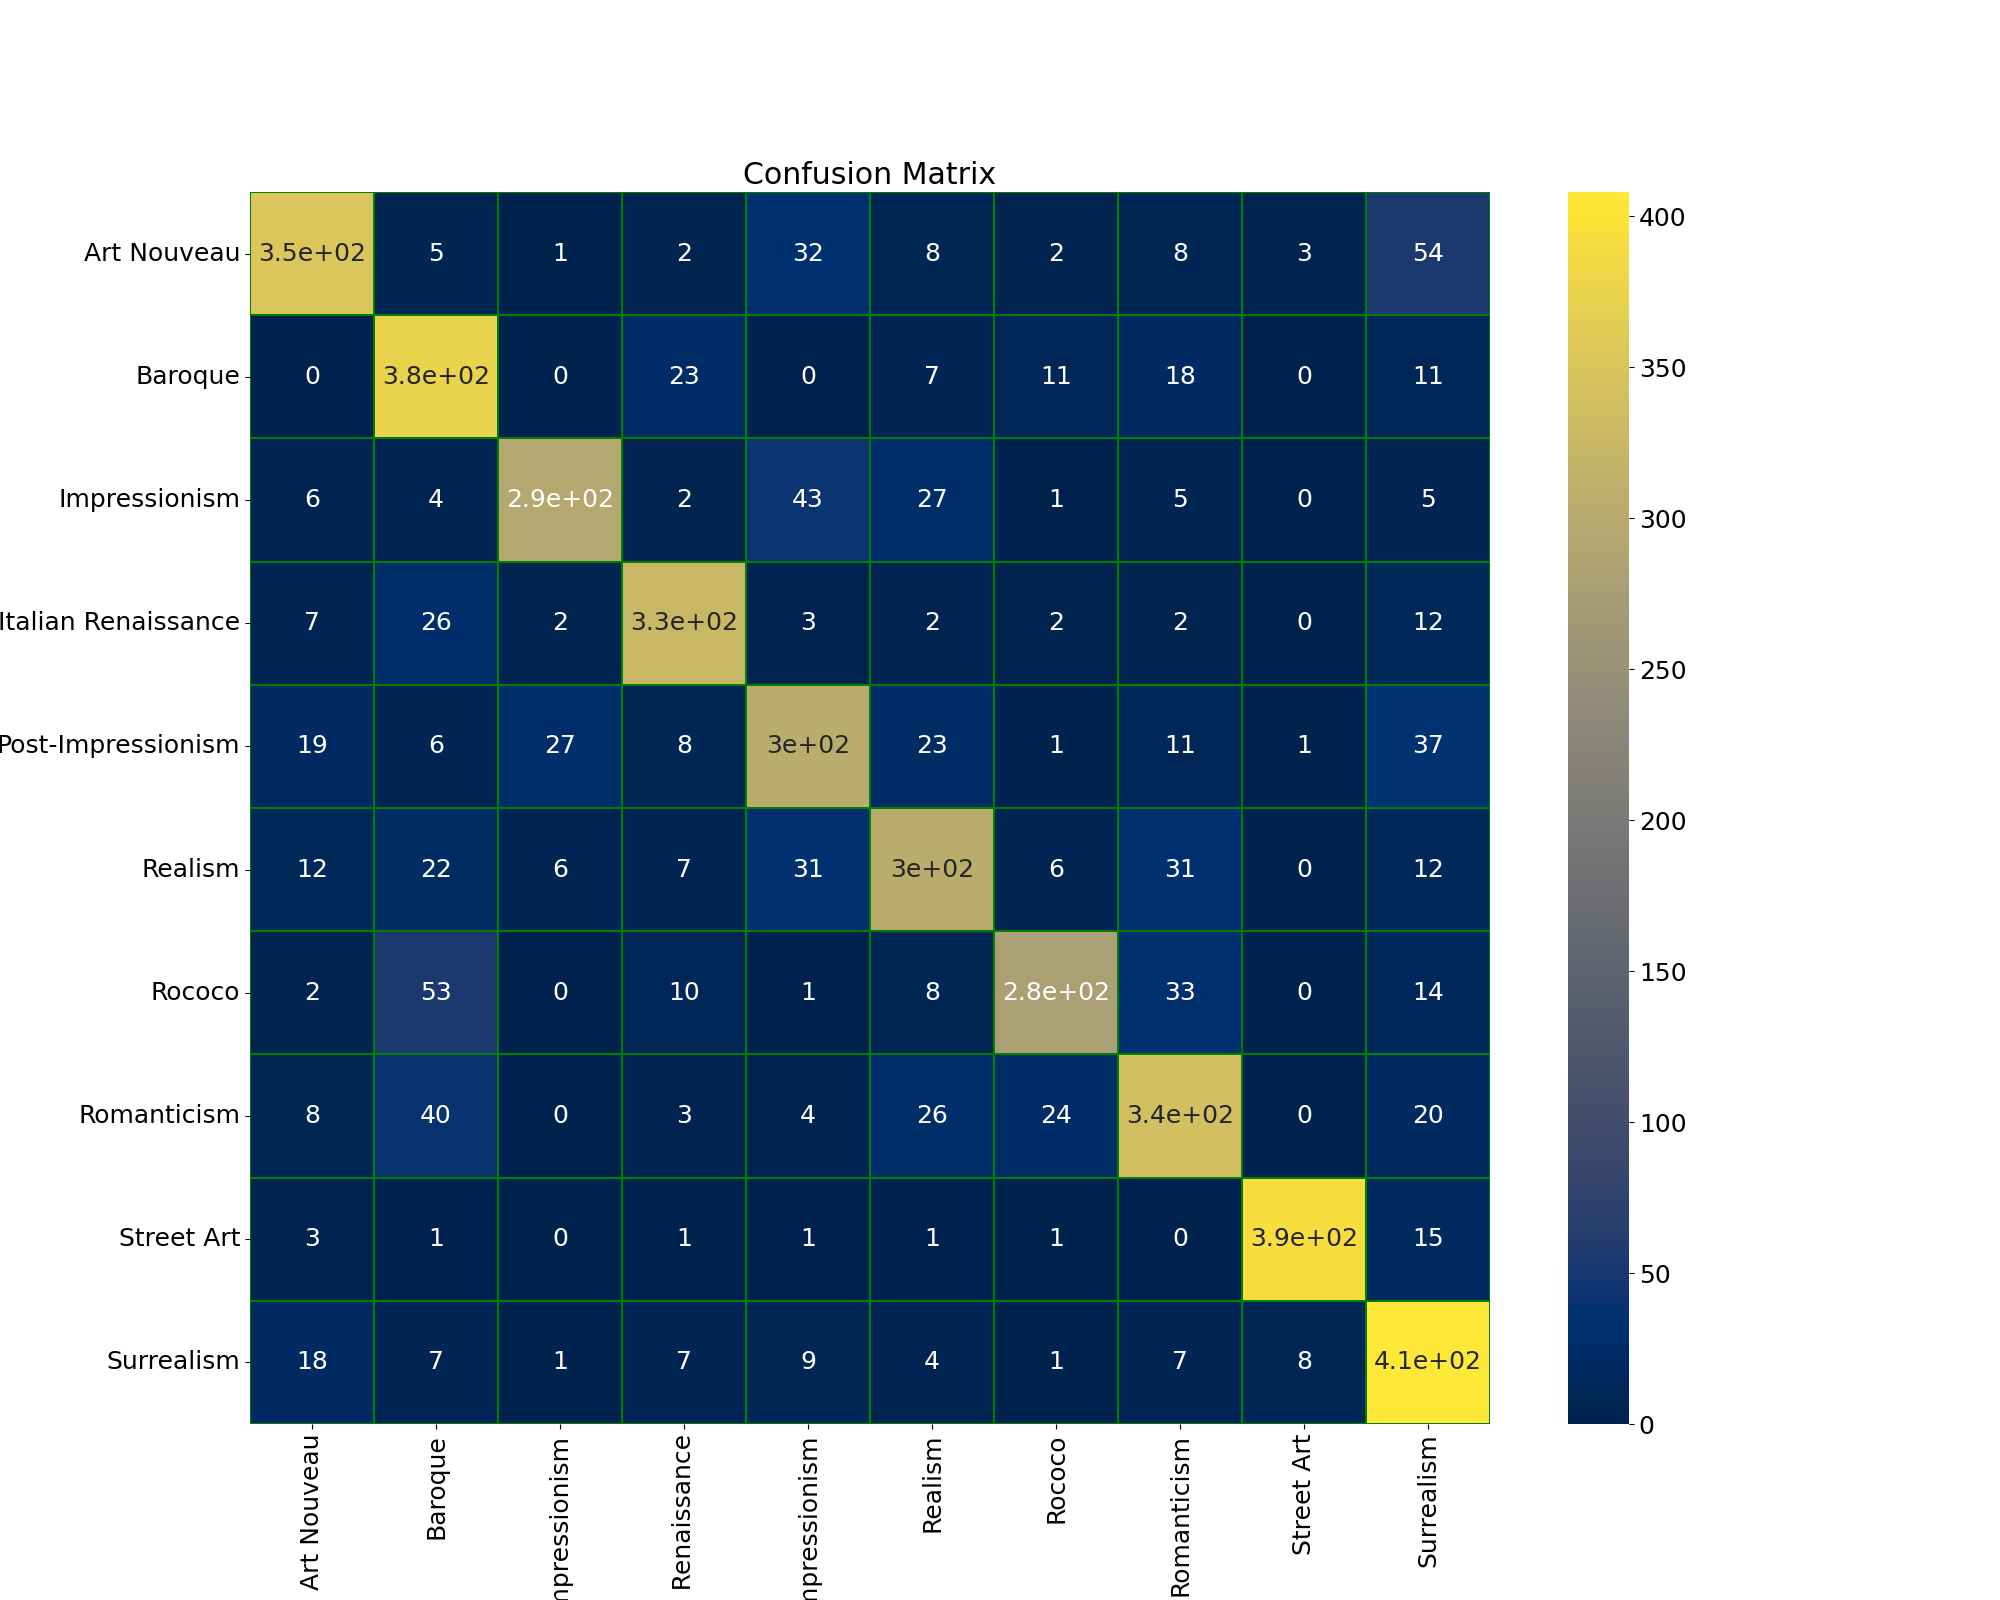

In [ ]:
# open and set the config file to enter all the training parameters
# and performance results

df_config = pd.read_excel(saved_model_path + "Config.xlsx", engine = "openpyxl")

# set the number of row to enter the inputs from this script

input_placeholder = len(df_config)
input_placeholder = input_placeholder + 1

# enter the name of file in config dataset

df_config.at[input_placeholder, 'File'] = file_name

# enter the accuracy percentage in config dataset

df_config.at[input_placeholder, 'Rate (%)'] = accuracy_rate

# enter the dimensions of the input images in config dataset

df_config.at[input_placeholder, 'Hight/Width'] = img_width

# enter the epochs number in config dataset

df_config.at[input_placeholder, 'Epochs'] = num_epochs

# enter the learning rate value in config dataset

df_config.at[input_placeholder, 'Learning_Rate'] = lrn_rate

# enter the activation function in config dataset

df_config.at[input_placeholder, 'Act_Func.'] = act_func

# enter the number of neurons of first dense layer in config dataset

df_config.at[input_placeholder, 'Neuron_1st_Dense'] = num_neurons_1st_dense

# enter the dropout rate of first dense layer in config dataset

df_config.at[input_placeholder, 'Dropout_1st_Dense'] = drop_perc_1st_dense

# enter the number of neurons of second dense layer in config dataset

df_config.at[input_placeholder, 'Neuron_2nd_Dense'] = num_neurons_2nd_dense

# enter the dropout rate of second dense layer in config dataset

df_config.at[input_placeholder, 'Dropout_2nd_Dense'] = drop_perc_2nd_dense

# enter the number of neurons of third dense layer in config dataset

df_config.at[input_placeholder, 'Neuron_3d_Dense'] = num_neurons_3d_dense

# enter the dropout rate of third dense layer in config dataset

df_config.at[input_placeholder, 'Dropout_3d_Dense'] = drop_perc_3d_dense

# save the config dataset

df_config.to_excel(saved_model_path + "Config.xlsx",
                   engine='openpyxl',
                   index = False)

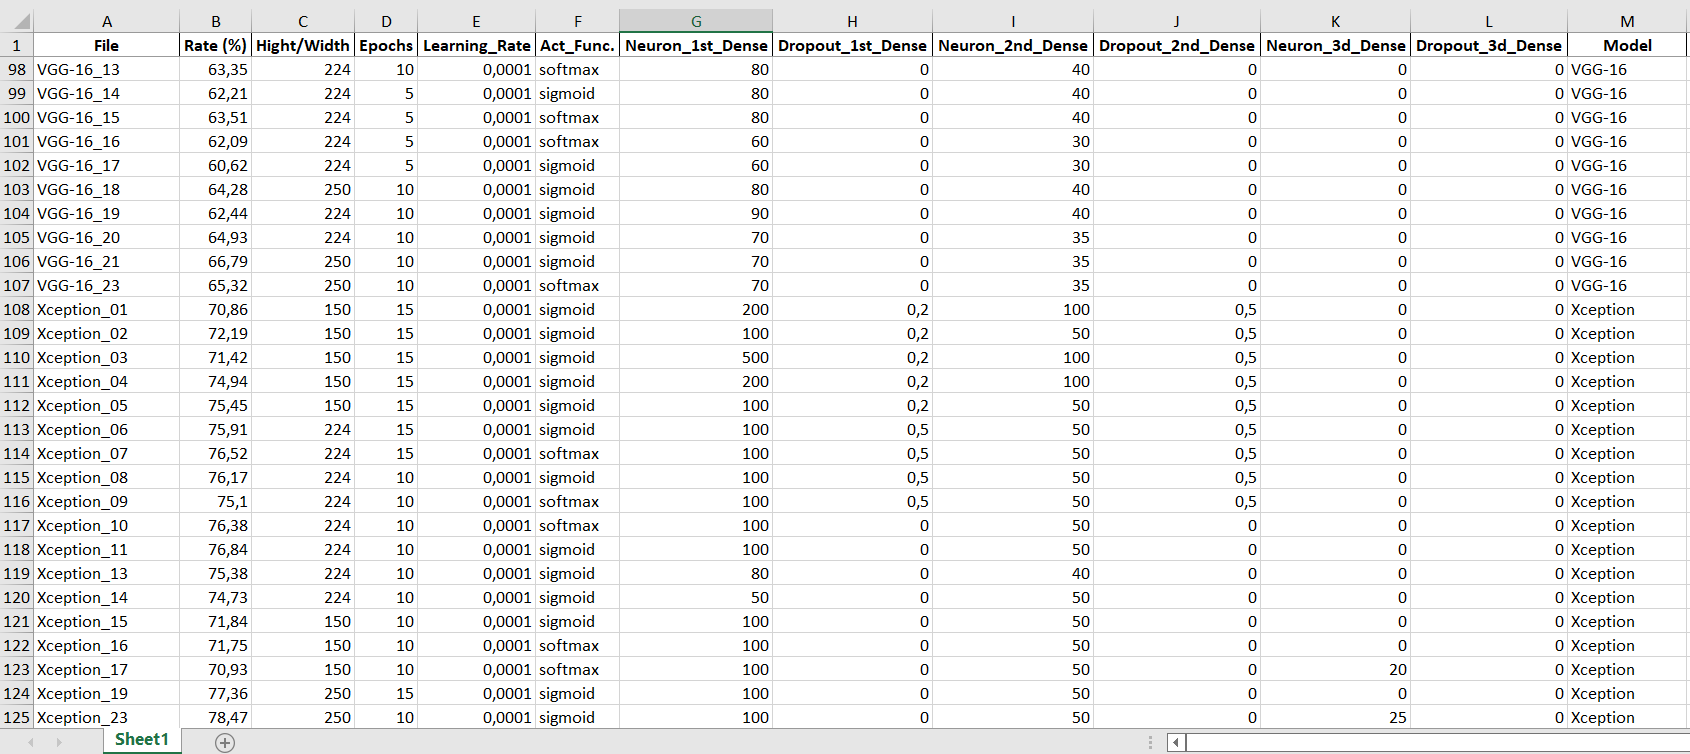

In [ ]:
### Rename the script file to add the accuracy percentage in the file name

file_before = path_scripts + file_name + ".py" 
file_after = path_scripts + file_name + "_(" + str(accuracy_rate) + ")"  + ".py"

os.rename(file_before, file_after)

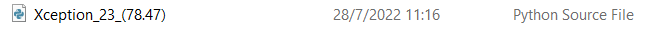